In [1]:
import os, sys
from pathlib import Path

# notebook_dir = Path().resolve()
# project_root = notebook_dir.parent  # go up one level
# sys.path.insert(0, str(project_root))
from convokit import Corpus, download
import re
import numpy as np

from utils.data_processing import DataProcesser
from utils.data_processing import TextProcesser
from utils import corpus_utils as corp
import pprint as pp
from model.config  import *

/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/.venv/lib/python3.11/site-packages/convokit/coordination/coordination.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


An error occurred: Torch not compiled with CUDA enabled


/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/.venv/lib/python3.11/site-packages/convokit/__init__.py:29: UserWarning: If you are using ConvoKit with Google Colab, incorrect versions of some packages (ex. scipy) may be imported while runtime start. To fix the issue, restart the session and run all codes again. Thank you!
  warnings.warn(


In [2]:
final_filepath_kodis = os.path.join(fine_processed_dir,'processed_kodis.csv')
raw_filepath_kodis = os.path.join(fine_raw_dir, 'KODIS-EN.csv')
corpus_kodis_filepath = os.path.join(corpus_dir, "custom")

In [3]:
kodis_data = DataProcesser(raw_filepath_kodis, label = True)
corp.setConversationMetadata(["buyer_is_AI", "seller_is_AI", "convo_len", "provided_outcome"
    ,"s_SVI_instrumental", "s_SVI_self", "s_SVI_process", "s_SVI_relationship"])
kodis_data.saveToCSV(final_filepath_kodis)
test = DataProcesser(final_filepath_kodis)
kodis_corpus = corp.corpusBuilder(test)
kodis_corpus.dump(name = "kodis_corpus", base_path = corpus_kodis_filepath)


Dropping 9 rows with missing formattedChat
2851
Dropping 0 rows with missing formattedChat
Dropping 0 rows with missing Outcome
Data saved to /Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/src/data/finetuning_preprocessing/processed/kodis/processed_kodis.csv
Row Index in columns
['predictions', 'scores']
*** 0 utterances with timestamp == 0 after imputation ***


id      speaker conversation_id      reply_to   timestamp  \
0         utt0_con0     Seller_0       utt0_con0          None  1699388149   
1         utt1_con0      Buyer_0       utt0_con0     utt0_con0  1699388150   
2         utt2_con0     Seller_0       utt0_con0     utt1_con0  1699388170   
3         utt3_con0      Buyer_0       utt0_con0     utt2_con0  1699388217   
4         utt4_con0     Seller_0       utt0_con0     utt3_con0  1699388235   
...             ...          ...             ...           ...         ...   
39463  utt5_con2850   Buyer_2850    utt0_con2850  utt4_con2850  1718879890   
39464  utt6_con2850  Seller_2850    utt0_con2850  utt5_con2850  1718879909   
39465  utt7_con2850   Buyer_2850    utt0_con2850  utt6_con2850  1718879998   
39466  utt8_con2850  Seller_2850    utt0_con2850  utt7_con2850  1718880018   
39467  utt9_con2850   Buyer_2850    utt0_con2850  utt8_con2850  1718880039   

                                                    text meta.predictions  \
0      Your sudden demand for a refund is unwarranted...             None   
1      This was not the item I ordered, please provid...             None   
2      How about a compromise? I can offer you a part...             None   
3      No, this was not the item I ordered. I have a ...             None   
4      I can scrutinize your claim, but this requires...             None   
...                                                  ...              ...   
39463  Thank you I appreciate that.  I shall remove m...             None   
39464  Deal. Once I see changes on your end, I'll ini...             None   
39465  I understand - please do follow through.  I ha...             None   
39466  You have my word, I will follow through. A sna...             None   
39467  Submitted agreement: Buyer gets full refund, b...             None   

      meta.scores  
0            None  
1            None  
2            None  
3            None  
4            None  
...           ...  
39463        None  
39464        None  
39465        None  
39466        None  
39467        None  

[39468 rows x 8 columns]

id
0         Seller_0
1          Buyer_0
2         Seller_0
3          Buyer_0
4         Seller_0
...            ...
39463   Buyer_2850
39464  Seller_2850
39465   Buyer_2850
39466  Seller_2850
39467   Buyer_2850

[39468 rows x 1 columns]

id  meta.buyer_is_AI  meta.seller_is_AI  meta.convo_len  \
0        utt0_con0             False               True              16   
1        utt0_con1             False              False              14   
2        utt0_con2             False               True              12   
3        utt0_con3              True              False              12   
4        utt0_con4              True              False              14   
...            ...               ...                ...             ...   
2846  utt0_con2846             False               True              16   
2847  utt0_con2847             False               True              10   
2848  utt0_con2848             False               True              15   
2849  utt0_con2849             False              False              11   
2850  utt0_con2850             False               True              10   

      meta.provided_outcome  meta.s_SVI_instrumental  meta.s_SVI_self  \
0                         1                      NaN              NaN   
1                         0                      7.0              5.5   
2                         0                      NaN              NaN   
3                         0                      7.0              7.0   
4                         0                      4.5              5.0   
...                     ...                      ...              ...   
2846                      0                      NaN              NaN   
2847                      0                      NaN              NaN   
2848                      0                      NaN              NaN   
2849                      0                      5.0              6.0   
2850                      0                      NaN              NaN   

      meta.s_SVI_process  meta.s_SVI_relationship  
0                    NaN                      NaN  
1                    7.0                      6.5  
2                    NaN                      NaN  
3                    7.0                      5.0  
4                    4.5                      5.5  
...                  ...                      ...  
2846                 NaN                      NaN  
2847                 NaN                      NaN  
2848                 NaN                      NaN  
2849                 6.5                      5.0  
2850                 NaN                      NaN  

[2851 rows x 9 columns]

['predictions', 'scores']

['buyer_is_AI',
 'seller_is_AI',
 'convo_len',
 'provided_outcome',
 's_SVI_instrumental',
 's_SVI_self',
 's_SVI_process',
 's_SVI_relationship']

39468it [00:00, 46524.18it/s]


Utterance conversation_ids missing from convos.id: -> 0
Conversation ids in convos not used by any utterance: -> 0
Every utterance.conversation_id exists in convos.id?: -> True
Every convos.id is referred to by at least one utterance?: -> True
Unique conversation_id’s in utterance DF: -> 2851
['utt0_con0' 'utt0_con1']


#  Kodis Data Preprocessing:
- out of all disputes:
    - 109 were AI for all 477 impasse 
    - 666 were AI for all 477 success
- out of Impasse:
    - 20 were impasse when AI was seller out of all 477 impasse
        - 3 chats had no "I Walk Away"  in dispute resolution software to formally end. None had "Submitted agreement"
        - Convo ID: (786, 881, 2752)
    - 89 chats were impasse when AI was buyer out of all 477 impasse 
        - 8 chats had no "I Walk Away" in dispute resolution software to formally end. None had "Submitted agreement"
        - Convo ID:(806, 1036, 2413, 2414, 2426, 2689, 2696, 2703)
    - No AI ended
- out of Success:
    -  410 were success when AI was seller out of all 2374 success
        -   410 chats had no "I Accept" in dispute resolution software to formally end. All had "Submitted agreement"
    -  256 were impasse when AI was buyer out of all 2374 success 
        -   256 chats had no "I Accept" in dispute resolution software to formally end. All had "Submitted agreement"


**Currently, All dialoags and utterances are included in the pre-training data**

In [ ]:
df = kodis_data.getDataframe()
# df = df[df['formattedChat'].str.contains("Accept Deal", regex=False, na=False, case=True)]
# df = df[~df['formattedChat'].str.contains("I Walk Away", regex=False, na=False, case=True)]
# ai_mask = ((df['buyer_is_AI'] == True)|df['seller_is_AI'] == True)
ai_mask = ((df['seller_is_AI'] == True))
df = df[df['formattedChat'].str.contains("Submitted agreement", regex=False, na=False, case=True)]
# df = df[df['buyer_is_AI'] == True]
df = df[ai_mask]
df = df[df['provided_outcome'] == 0]
print(df.shape)
for idx, row in df.iterrows():
    print("— Conversation Row_Index:", idx)
    print(row['formattedChat'])
    print()

(410, 112)
— Conversation Row_Index: 2
nan Seller: Your sudden demand for a refund is unwarranted. Our product description is crystal clear, and we stand by our policy. Your behavior is disappointing, and your negative review is unfounded.
1699388998 Buyer: As a customer, I thought the jersey was Kolby's and I noticed you changed the site since then. I think a refund is fair. 
1699389021 Seller: We have not made any changes to the site. The listing has always clearly stated that the jersey is a general LA Lakers replica, not specific to any player. If you remove the negative review promptly, I'd consider offering a partial refund.
1699389060 Buyer: I would be happy to remove the negative review but I want a full refund. 
1699389082 Seller: Under these circumstances, I agree to give you a full refund if you take down your negative review immediately. Let's treat this as a misunderstanding and move forward.
1699389168 Buyer: I couldn't agree more. I'm taking down the review. I've shopped

/var/folders/3m/c14l8zg55jqdgkz6b8lkr6z40000gn/T/ipykernel_13707/930610257.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ai_mask]


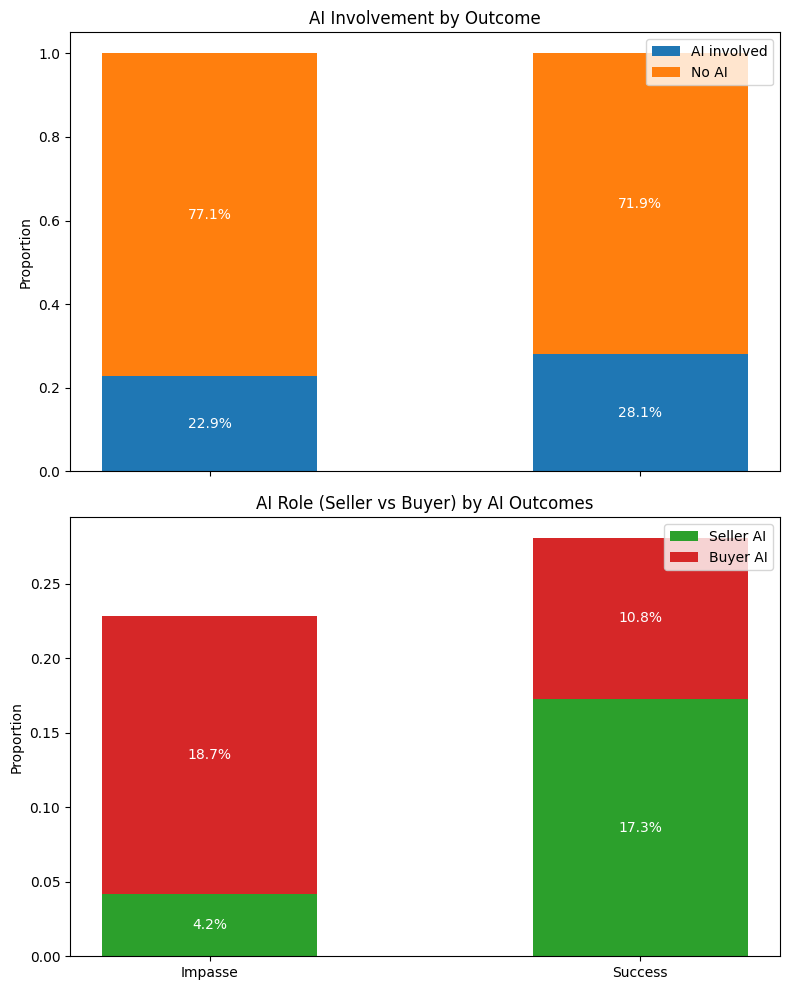

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_kodis_ai_distributions():
    # raw counts from your summary
    impasse_total  = 477
    success_total  = 2374

    # “AI involved” breakdown
    imp_AI   = 109   # 20 seller + 89 buyer
    succ_AI  = 666   # 410 seller + 256 buyer
    imp_noAI = impasse_total - imp_AI
    succ_noAI= success_total - succ_AI

    # within‐AI breakdown
    imp_seller, imp_buyer = 20, 89
    succ_seller, succ_buyer = 410, 256

    # 1) proportions for “AI vs no AI” by outcome
    labels    = ["Impasse","Success"]
    ai_props  = [imp_AI/impasse_total, succ_AI/success_total]
    noai_props= [imp_noAI/impasse_total, succ_noAI/success_total]

    # 2) proportions for “Seller vs Buyer” by outcome
    seller_props = [imp_seller/impasse_total, succ_seller/success_total]
    buyer_props  = [imp_buyer/impasse_total, succ_buyer/success_total]

    x = np.arange(len(labels))
    width = 0.5

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10), sharex=True)

    # --- Top: AI involvement vs none ---
    ax1.bar(x, ai_props,   width, label="AI involved", color="tab:blue")
    ax1.bar(x, noai_props, width, bottom=ai_props, label="No AI",      color="tab:orange")

    # annotate %
    for i in x:
        ax1.text(i, ai_props[i]/2,
                 f"{ai_props[i]*100:.1f}%",
                 ha="center", va="center", color="white")
        ax1.text(i, ai_props[i] + noai_props[i]/2,
                 f"{noai_props[i]*100:.1f}%",
                 ha="center", va="center", color="white")

    ax1.set_ylabel("Proportion")
    ax1.set_title("AI Involvement by Outcome")
    ax1.legend(loc="upper right")
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)

    # --- Bottom: Seller vs Buyer within outcome ---
    ax2.bar(x, seller_props, width, label="Seller AI", color="tab:green")
    ax2.bar(x, buyer_props,  width, bottom=seller_props, label="Buyer AI", color="tab:red")

    # annotate %
    for i in x:
        ax2.text(i, seller_props[i]/2,
                 f"{seller_props[i]*100:.1f}%",
                 ha="center", va="center", color="white")
        ax2.text(i, seller_props[i] + buyer_props[i]/2,
                 f"{buyer_props[i]*100:.1f}%",
                 ha="center", va="center", color="white")

    ax2.set_ylabel("Proportion")
    ax2.set_title("AI Role (Seller vs Buyer) by AI Outcomes")
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()
    
plot_kodis_ai_distributions()

In [ ]:
test.filterMatches("Submitted agreement")
only_submit = test.getMatchedConvoDF("Submitted agreement")
# Count how many “Submit agreement” substrings appear (case‐insensitive)
mask = only_submit['formattedChat'].str.count(r'Submitted agreement', flags=re.IGNORECASE) >= 2
# Select just those rows
multi_submit = only_submit[mask]
display(multi_submit)
for idx, row in only_submit[mask].iterrows():
    print("— Conversation Row_Index:", idx)
    print(row['formattedChat'])
    print()

ID b_Gender                      b_Education  \
Row_Index                                                   
18           19     Male                Bachelor's Degree   
53           54      NaN                              NaN   
67           68      NaN                              NaN   
97           98     Male                Bachelor's Degree   
112         113     Male       Some college but no degree   
...         ...      ...                              ...   
2788       2828   Female  Graduate or professional degree   
2793       2833     Male       Some college but no degree   
2808       2848     Male                Bachelor's Degree   
2817       2858     Male       High school diploma or GED   
2827       2868   Female                Bachelor's Degree   

                                                   b_country  b_Risk  \
Row_Index                                                              
18                                  United States of America     4.0   
53                                                       NaN     NaN   
67                                                       NaN     NaN   
97                                  United States of America     1.0   
112                                 United States of America     3.0   
...                                                      ...     ...   
2788                                            South Africa     6.0   
2793       United Kingdom of Great Britain and Northern I...     5.0   
2808       United Kingdom of Great Britain and Northern I...     3.0   
2817       United Kingdom of Great Britain and Northern I...     5.0   
2827       United Kingdom of Great Britain and Northern I...     4.0   

                                                    b_Refund  \
Row_Index                                                      
18                   I paid for something I did not receive.   
53         You still wont have enough to then go and buy ...   
67         This is important to me because I still want t...   
97                       Full refund because order was wrong   
112        I need the money as I am not in good financial...   
...                                                      ...   
2788       I require the full refund in order to get the ...   
2793       The money i spent should be returned to me bec...   
2808       They have mis-sold an item, I would expect a f...   
2817       The item was not as described when purchased, ...   
2827       At the time of purchase, the description was d...   

                                                  b_MyReview  \
Row_Index                                                      
18          Because the seller really lied about everything.   
53                    To let others know about what happened   
67         I would want other people to know about their ...   
97                                    Others need the review   
112        It was an honest assessment of your selling ta...   
...                                                      ...   
2788       The seller is dishonest by not selling the jer...   
2793       I will insist on keeping the review on the sit...   
2808       It is important to warn others of their behavi...   
2817       To warn others. They may have bullied other pe...   
2827       The review offers other the insight into my ne...   

                                                  b_OtherRev  \
Row_Index                                                      
18               To protect my own reputation and integrity.   
53         You would want to so that other sellers will c...   
67         I would want to maintain my positive standing ...   
97                                Not the worst but is wrong   
112        It is based on lies, and I did not do anything...   
...                                                      ...   
2788       I do not want him to ruin my reputation and l ...   
2793       I do not want other sellers t

— Conversation Row_Index: 18
1699668832 Buyer: I need to get a full refund for my purchase.
1699668855 Seller: I refuse to offer a refund but I would like an apology.
1699668916 Buyer: Why would you apologize and not issue a refund. If you make an apology, then obviously you understand what you did was wrong. I was sent something that I never ordered.
1699668939 Seller: An apology from you for the bad review that you gave to me.
1699668984 Buyer: You are not getting an apology from me. I must get a full refund.
1699669018 Seller: You will only get a refund from me if you retract the bad review and apologize to me.
1699669054 Buyer: I will retract my statement if you give me a full refund, but I must also know that you are going to retract your bad review of me.
1699669095 Seller: I will if you give me an apology.
1699669131 Buyer: I will give you an apology if you refund the full amount.
1699669178 Seller: Okay so I will refund and remove the bad review that I gave you and you will ret

In [9]:
def avg_interval_between(
    text, 
    keyword, 
    splitter="\n",
    case_sensitive=False
) -> float:
    """
    Given any text blob (e.g. a single string from a df column),
    split it by `splitter` (default newline), find all line-indices
    that contain `keyword`, then return the average gap between them.
    If fewer than two hits, returns np.nan.

    - keyword: substring to search for
    - case_sensitive: if False, both text & keyword are lowercased
    """
    # Safely handle non-strings
    if not isinstance(text, str):
        return np.nan

    if not case_sensitive:
        text    = text.lower()
        keyword = keyword.lower()

    # Split into lines (or whatever)
    lines = text.split(splitter)
    # Collect indices of any line containing the keyword
    idxs = [i for i, line in enumerate(lines) if keyword in line]
    # Need at least two to compute an interval
    if len(idxs) < 2:
        return np.nan

    # Compute consecutive gaps
    gaps = np.diff(idxs)  # yields array of [idxs[1]-idxs[0], idxs[2]-idxs[1], …]
    gaps = gaps -1
    return float(gaps.mean())


only_submit['avg_submit_interval'] = only_submit['formattedChat'].apply(lambda txt: avg_interval_between(txt, "Submitted agreement"))
display(only_submit[mask][['formattedChat', 'avg_submit_interval']])

grouped = only_submit.groupby('provided_outcome')['avg_submit_interval'].mean()

print(grouped)



formattedChat  \
Row_Index                                                      
18         1699668832 Buyer: I need to get a full refund ...   
53         1701299219 Buyer: Hello, I am writing to reque...   
67         1701301304 Buyer: You know the site was advert...   
97         1701385289 Buyer: I recieved the wrong item an...   
112        1701465872 Buyer: I did not deserve a negative...   
...                                                      ...   
2788       1718700114 Buyer: I ordered the kobe byrant je...   
2793       1718700757 Buyer: I need you to take down the ...   
2808       1718874191 Buyer: Hi, the Kobe Bryant jersey y...   
2817       1718874101 Buyer: Hello, I have been given the...   
2827       1718874274 Buyer: Hi, I have recieved a produc...   

           avg_submit_interval  
Row_Index                       
18                    1.000000  
53                    1.000000  
67                    1.000000  
97                    1.000000  
112                   1.000000  
...                        ...  
2788                  1.666667  
2793                  1.000000  
2808                  3.500000  
2817                  2.333333  
2827                  1.000000  

[247 rows x 2 columns]

provided_outcome
0    2.123221
1    1.561722
Name: avg_submit_interval, dtype: float64


# Deal No Deal Data Preprocessing

In [11]:
deal_no_deal_train = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_train.txt"
deal_no_deal_val = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_val.txt"
deal_no_deal_test = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_test.txt"
test_test = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/test_text.txt"
files = [deal_no_deal_train,deal_no_deal_val,deal_no_deal_test]
file_test =[test_test]
deal_no_deal = TextProcessor(files)

Parsed 6313 unique dialogues from ['/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_train.txt', '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_val.txt', '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/dealndeal_test.txt']
Created utterances df with 31356 rows
Created conversations df with 6313 rows


In [12]:
deal_no_deal.records

[{'input': '1 4 4 1 1 2',
  'dialogue': 'THEM: i would like 4 hats and you can have the rest . <eos> YOU: deal <eos> THEM: <selection>',
  'output': 'item0=1 item1=0 item2=1 item0=0 item1=4 item2=0',
  'partner_input': '1 0 4 2 1 2'},
 {'input': '1 2 3 2 1 2',
  'dialogue': 'THEM: hi i would like the book and ball and you can have the hats <eos> YOU: i can give you either the book or the ball <eos> THEM: ill take the book <eos> YOU: ok i will take the hats and ball <eos> THEM: deal <eos> YOU: <selection>',
  'output': 'item0=0 item1=3 item2=1 item0=1 item1=0 item2=0',
  'partner_input': '1 10 3 0 1 0'},
 {'input': '4 1 1 6 2 0',
  'dialogue': "YOU: i would like the hat and 3 books <eos> THEM: can i have the hat and the balls ? <eos> YOU: i need to have the hat <eos> THEM: take the books and give me the hat , its a win win , right ? <eos> YOU: no it's not <eos> THEM: <selection>",
  'output': '<disagree> <disagree> <disagree> <disagree> <disagree> <disagree>',
  'partner_input': '4 0 1 

In [ ]:
corp.setConversationMetadata(metadata = ['input', 'partner_input', 'selection_you', 'selection_them', 'convo_len'])
corpus_deal = corp.corpusBuilder(deal_no_deal)

*** 0 utterances with timestamp == 0 after imputation ***


id    speaker   conversation_id          reply_to  \
0         uttdeal0_con0     THEM_0     uttdeal0_con0              None   
1         uttdeal1_con0      YOU_0     uttdeal0_con0     uttdeal0_con0   
2         uttdeal0_con1     THEM_1     uttdeal0_con1              None   
3         uttdeal1_con1      YOU_1     uttdeal0_con1     uttdeal0_con1   
4         uttdeal2_con1     THEM_1     uttdeal0_con1     uttdeal1_con1   
...                 ...        ...               ...               ...   
31351  uttdeal0_con6311   YOU_6311  uttdeal0_con6311              None   
31352  uttdeal1_con6311  THEM_6311  uttdeal0_con6311  uttdeal0_con6311   
31353  uttdeal2_con6311   YOU_6311  uttdeal0_con6311  uttdeal1_con6311   
31354  uttdeal0_con6312  THEM_6312  uttdeal0_con6312              None   
31355  uttdeal1_con6312   YOU_6312  uttdeal0_con6312  uttdeal0_con6312   

        timestamp                                               text  
0      1748337644    i would like 4 hats and you can have the rest .  
1      1748337645                                               deal  
2      1748337644  hi i would like the book and ball and you can ...  
3      1748337645         i can give you either the book or the ball  
4      1748337646                                  ill take the book  
...           ...                                                ...  
31351  1748337644  i just wan the balls and book please you take ...  
31352  1748337645           you can have the balls , i need the rest  
31353  1748337646                                               deal  
31354  1748337644  i'll take both books , you can have everything...  
31355  1748337645                                               deal  

[31356 rows x 6 columns]

id
0         THEM_0
1          YOU_0
2         THEM_1
3          YOU_1
4         THEM_1
...          ...
31351   YOU_6311
31352  THEM_6311
31353   YOU_6311
31354  THEM_6312
31355   YOU_6312

[31356 rows x 1 columns]

id   meta.input meta.partner_input  \
0        uttdeal0_con0  1 4 4 1 1 2        1 0 4 2 1 2   
1        uttdeal0_con1  1 2 3 2 1 2       1 10 3 0 1 0   
2        uttdeal0_con2  4 1 1 6 2 0        4 0 1 6 2 2   
3        uttdeal0_con3  1 1 3 1 2 3       1 10 3 0 2 0   
4        uttdeal0_con4  1 6 2 0 4 1        1 8 2 1 4 0   
...                ...          ...                ...   
6308  uttdeal0_con6308  1 7 3 0 1 3        1 5 3 1 1 2   
6309  uttdeal0_con6309  3 0 2 2 2 3        3 2 2 2 2 0   
6310  uttdeal0_con6310  2 1 1 8 3 0        2 1 1 5 3 1   
6311  uttdeal0_con6311  1 2 3 0 1 8        1 5 3 1 1 2   
6312  uttdeal0_con6312  2 1 2 3 1 2        2 5 2 0 1 0   

                        meta.selection_you  \
0     {'item0': 1, 'item1': 0, 'item2': 1}   
1     {'item0': 0, 'item1': 3, 'item2': 1}   
2                     {'agreement': False}   
3     {'item0': 0, 'item1': 1, 'item2': 2}   
4                     {'agreement': False}   
...                                    ...   
6308                  {'agreement': False}   
6309  {'item0': 0, 'item1': 1, 'item2': 2}   
6310  {'item0': 0, 'item1': 1, 'item2': 0}   
6311  {'item0': 0, 'item1': 0, 'item2': 1}   
6312  {'item0': 0, 'item1': 2, 'item2': 1}   

                       meta.selection_them  meta.convo_len  
0     {'item0': 0, 'item1': 4, 'item2': 0}               2  
1     {'item0': 1, 'item1': 0, 'item2': 0}               5  
2                     {'agreement': False}               5  
3     {'item0': 1, 'item1': 2, 'item2': 0}               4  
4                     {'agreement': False}              10  
...                                    ...             ...  
6308                  {'agreement': False}               3  
6309  {'item0': 3, 'item1': 1, 'item2': 0}               3  
6310  {'item0': 2, 'item1': 0, 'item2': 3}               5  
6311  {'item0': 1, 'item1': 3, 'item2': 0}               3  
6312  {'item0': 2, 'item1': 0, 'item2': 0}               2  

[6313 rows x 6 columns]

31356it [00:00, 42803.49it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
6313 unique IDs in your utterance DF
['uttdeal0_con0' 'uttdeal0_con1' 'uttdeal0_con2' 'uttdeal0_con3'
 'uttdeal0_con4' 'uttdeal0_con5' 'uttdeal0_con6' 'uttdeal0_con7'
 'uttdeal0_con8' 'uttdeal0_con9']
Unique conversation_id’s in your utterance DF: 6313


In [16]:
conv_gen = corpus_deal.iter_conversations()

# pull out the first Conversation
first_conv = next(conv_gen)
first_conv.get_chronological_utterance_list()

[Utterance({'obj_type': 'utterance', 'vectors': [], 'speaker_': Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x157022790>, 'id': 'THEM_0', 'meta': ConvoKitMeta({})}), 'owner': <convokit.model.corpus.Corpus object at 0x157022790>, 'id': 'uttdeal0_con0', 'meta': ConvoKitMeta({})}),
 Utterance({'obj_type': 'utterance', 'vectors': [], 'speaker_': Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x157022790>, 'id': 'YOU_0', 'meta': ConvoKitMeta({})}), 'owner': <convokit.model.corpus.Corpus object at 0x157022790>, 'id': 'uttdeal1_con0', 'meta': ConvoKitMeta({})})]

# Casino Preprocessing (Existing Corpus in ConvoKit)

In [17]:
corpus_casino = Corpus(filename=download("casino-corpus"))

Dataset already exists at /Users/mishkin/.convokit/saved-corpora/casino-corpus


In [18]:
corpus_casino.get_utterances_dataframe()

timestamp                                               text  \
id                                                                             
utterance_0          None  Hello! 🙂 Let's work together on a deal for the...   
utterance_1          None  Hey! I'd like some more firewood to keep my do...   
utterance_2          None  I need firewood as well. We have a large group...   
utterance_3          None         I see. 😮 What are you least interested in?   
utterance_4          None  We can make do without extra water. Can we tra...   
...                   ...                                                ...   
utterance_14292      None  Yes that's right. sorry about that. you get 3 ...   
utterance_14293      None                                    Yep, that's it.   
utterance_14294      None  Glad that's settled. Hope you all have a good ...   
utterance_14295      None                                        Submit-Deal   
utterance_14296      None                                        Accept-Deal   

                     speaker         reply_to  conversation_id  \
id                                                               
utterance_0        speaker_0             None      utterance_0   
utterance_1        speaker_1      utterance_0      utterance_0   
utterance_2        speaker_0      utterance_1      utterance_0   
utterance_3        speaker_1      utterance_2      utterance_0   
utterance_4        speaker_0      utterance_3      utterance_0   
...                      ...              ...              ...   
utterance_14292  speaker_845  utterance_14291  utterance_14282   
utterance_14293  speaker_614  utterance_14292  utterance_14282   
utterance_14294  speaker_845  utterance_14293  utterance_14282   
utterance_14295  speaker_614  utterance_14294  utterance_14282   
utterance_14296  speaker_845  utterance_14295  utterance_14282   

                meta.dialogue_id                  meta.annotations  \
id                                                                   
utterance_0                    0  promote-coordination,elicit-pref   
utterance_1                    0            other-need,elicit-pref   
utterance_2                    0                        other-need   
utterance_3                    0                       elicit-pref   
utterance_4                    0                     non-strategic   
...                          ...                               ...   
utterance_14292             1029                              None   
utterance_14293             1029                              None   
utterance_14294             1029                              None   
utterance_14295             1029                              None   
utterance_14296             1029                              None   

                meta.speaker_internal_id meta.speaker_id  \
id                                                         
utterance_0                mturk_agent_1       speaker_0   
utterance_1                mturk_agent_2       speaker_1   
utterance_2                mturk_agent_1       speaker_0   
utterance_3                mturk_agent_2       speaker_1   
utterance_4                mturk_agent_1       speaker_0   
...                                  ...             ...   
utterance_14292            mturk_agent_2     speaker_845   
utterance_14293            mturk_agent_1     speaker_614   
utterance_14294            mturk_agent_2     speaker_845   
utterance_14295            mturk_agent_1     speaker_614   
utterance_14296            mturk_agent_2     speaker_845   

                                            meta.issue2youget  \
id                                                              
utterance_0                                               NaN   
utterance_1                                               NaN   
utterance_2                                               NaN   
utterance_3                                               NaN   
utterance_4                       

In [19]:
corpus_casino.get_conversations_dataframe()

vectors meta.dialogue_id  \
id                                         
utterance_0          []                0   
utterance_13         []                1   
utterance_26         []                2   
utterance_38         []                3   
utterance_50         []                4   
...                 ...              ...   
utterance_14228      []             1025   
utterance_14241      []             1026   
utterance_14258      []             1027   
utterance_14270      []             1028   
utterance_14282      []             1029   

                                             meta.participant_info  
id                                                                  
utterance_0      {'mturk_agent_1': {'value2issue': {'Medium': '...  
utterance_13     {'mturk_agent_1': {'value2issue': {'High': 'Fo...  
utterance_26     {'mturk_agent_1': {'value2issue': {'Medium': '...  
utterance_38     {'mturk_agent_1': {'value2issue': {'Low': 'Foo...  
utterance_50     {'mturk_agent_1': {'value2issue': {'High': 'Fo...  
...                                                            ...  
utterance_14228  {'mturk_agent_1': {'value2issue': {'Low': 'Foo...  
utterance_14241  {'mturk_agent_1': {'value2issue': {'Medium': '...  
utterance_14258  {'mturk_agent_1': {'value2issue': {'Low': 'Foo...  
utterance_14270  {'mturk_agent_1': {'value2issue': {'High': 'Fo...  
utterance_14282  {'mturk_agent_1': {'value2issue': {'High': 'Fo...  

[1030 rows x 3 columns]

In [20]:
Hello! 🙂 Let's work together on a deal for these packages, shall we? What are you most interested in?

Object `in` not found.


convo = 

In [ ]:
conv_gen = corpus_casino.iter_conversations()

for convo in corpus_casino.iter_conversations():
    for dialog in convo.get_root_to_leaf_paths():
                dialog_json = [{'text': utt.text} for utt in dialog]
                pp.pprint(dialog_json +['\n'])


[{'text': "Hello! 🙂 Let's work together on a deal for these packages, shall "
          'we? What are you most interested in?'},
 {'text': "Hey! I'd like some more firewood to keep my doggo warm. What do you "
          'need?'},
 {'text': 'I need firewood as well. We have a large group consisting of mostly '
          "senior citizens, including my grandma, so we'd like the firewood to "
          'keep everyone warm.'},
 {'text': 'I see. 😮 What are you least interested in?'},
 {'text': 'We can make do without extra water. Can we trade two waters for an '
          'extra firewood package and an extra food package?'},
 {'text': "We could do without the water as well. I'm willing to trade you 3 "
          'firewood for 3 food and 2 waters'},
 {'text': "We need some firewood too, though! ☹️ Let's try to make a deal that "
          'benefits us both! 🙂 Could I have 1 firewood, 3 food, and 3 waters?'},
 {'text': 'I meant I would give you my firewood, what would you trade in '
          

# Saving Corpora

In [ ]:
file_p = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/CRAFT/nn_preprocessing/custom/corpora"
kodis_corpus.dump(name = "kodis_corpus", base_path = file_p)
corpus_deal.dump(name = "deal_no_deal_corpus", base_path = file_p)
corpus_casino.dump(name = "casino_corpus", base_path = file_p)